In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
consumerDiscrete = pd.read_excel('../data/U of M Student Data - Consumer Discretionary .xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )
consumerStaples = pd.read_excel('../data/U of M Student Data - Consumer Staples.xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )
industrials = pd.read_excel('../data/U of M Student Data - Industrials.xlsx',\
                                     'Screening', skiprows=7, na_values=['-', 'NM'] )

In [3]:
rename_col_dict = {'Industry Classifications':'industry', 'Geographic Locations':'loc',
    'Total Enterprise Value [My Setting] [12/31/2016] ($USDmm, Historical rate)':'t_ev',
    'Total Revenue [LTM] ($USDmm, Historical rate)':'t_rev',
    'EBITDA [LTM] ($USDmm, Historical rate)':'ebitda',
    'EBITDA Margin % [LTM]':'ebitda_margin',
    'TEV/LTM Total Revenues [My Setting] [LTM as of 12/31/2016] (x)':'t_ev/ltm',
    'TEV/LTM EBITDA [My Setting] [LTM as of 12/31/2016] (x)':'t_ev/ltm_ebitda',
    'Est. Annual Revenue Growth - 1 Yr % - Capital IQ [Latest] (%)':'est_ann_rev_gr_minus_1yr_minus_capiq',
    'Est. Annual EBITDA Growth - 1 Yr % - Capital IQ [Latest] (%)':'est_ann_ebitda_gr_minus_1yr_minus_capiq',
    'Total Revenues, 1 Yr Growth % [LTM] (%)':'t_rev_1yr_growth',
    'EBITDA, 1 Yr Growth % [LTM] (%)':'ebitda_1yr_gr',
    'Total Revenues, 3 Yr CAGR % [LTM] (%)':'t_rev_3_yr_cagr',
    'EBITDA, 3 Yr CAGR % [LTM] (%)':'ebitda_3yr_cagr',
    'Total Revenues, 5 Yr CAGR % [LTM] (%)':'t_rev_5yr_cagr',
    'EBITDA, 5 Yr CAGR % [LTM] (%)':'ebitda_5yr_cagr',
    'Return on Assets % [LTM]':'return_on_assets',
    'Return on Equity % [LTM]':'return_on_equity',
    'Capex as % of Revenues [Latest Annual] (%)':'capex/rev',
    'EBITDA / Interest Exp. [LTM]':'ebitda/interest_exp',
    'Total Debt/Capital % [Latest Annual]':'t_debt/cap',
    'Total Debt/Equity % [Latest Annual]':'t_debt/equity'}

In [4]:
consumerDiscrete.rename(columns=rename_col_dict, inplace=True)
consumerStaples.rename(columns=rename_col_dict, inplace=True)
industrials.rename(columns=rename_col_dict, inplace=True)

Let's look at `industrials`. First, I will do a basic overview of the data.

In [5]:
print 'industrials dataframe shape: ', industrials.shape
print 'columns name: ', industrials.columns.tolist()
print
print industrials.head(3)

industrials dataframe shape:  (473, 25)
columns name:  [u'Company Name', u'Exchange:Ticker', 'industry', u'Company Type', 'loc', 't_ev', 't_rev', 'ebitda', 'ebitda_margin', 't_ev/ltm', 't_ev/ltm_ebitda', 'est_ann_rev_gr_minus_1yr_minus_capiq', 'est_ann_ebitda_gr_minus_1yr_minus_capiq', 't_rev_1yr_growth', 'ebitda_1yr_gr', 't_rev_3_yr_cagr', 'ebitda_3yr_cagr', 't_rev_5yr_cagr', 'ebitda_5yr_cagr', 'return_on_assets', 'return_on_equity', 'capex/rev', 'ebitda/interest_exp', 't_debt/cap', 't_debt/equity']

                         Company Name Exchange:Ticker               industry  \
0               3M Company (NYSE:MMM)        NYSE:MMM  Industrials (Primary)   
1  A. O. Smith Corporation (NYSE:AOS)        NYSE:AOS  Industrials (Primary)   
2          AAON, Inc. (NasdaqGS:AAON)   NasdaqGS:AAON  Industrials (Primary)   

     Company Type                                 loc      t_ev    t_rev  \
0  Public Company  United States of America (Primary)  117144.9  30109.0   
1  Public Company  U

In [5]:
# let's take a look at numerical data
num_industrials = industrials.iloc[:, 5:]

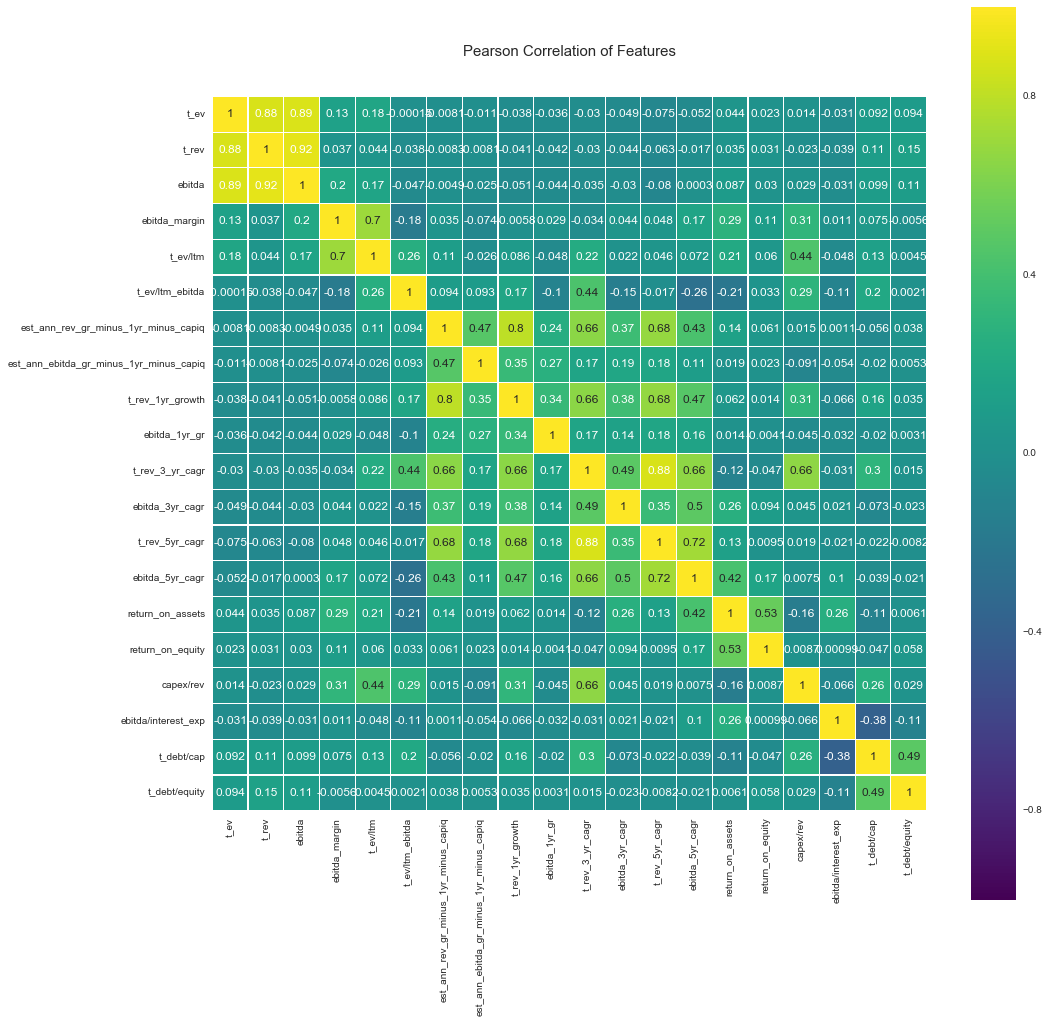

In [7]:
#num_industrials.corr(): Compute pairwise correlation of columns, excluding NA/null values
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(num_industrials.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Takeaway from this plot is that TEV is strongly correlated with total revenue [LTM] and EBITDA.

In [8]:
num_industrials.describe()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/ltm,t_ev/ltm_ebitda,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_gr,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex/rev,ebitda/interest_exp,t_debt/cap,t_debt/equity
count,464.000000,473.000000,473.000000,473.000000,473.000000,473.000000,365.000000,352.000000,464.000000,445.000000,440.000000,417.000000,414.000000,398.000000,456.000000,439.000000,448.000000,425.000000,418.000000,402.000000
mean,6882.037739,3752.799408,572.919180,14.193154,1.634875,13.849626,2.453638,5.309605,6.940731,18.025584,9.517975,9.469693,6.517459,8.127977,5.686796,-17.540362,6.211795,23.685012,46.270344,176.257816
std,24574.638037,10119.915553,1559.209579,10.771110,1.382043,17.364992,17.747395,42.065982,37.164088,131.301890,70.203511,33.967321,15.314651,19.555171,5.095742,719.098126,17.162955,44.524821,32.388878,525.716204
min,0.141000,1.260000,-0.295000,-9.930000,0.022000,0.047000,-52.700000,-93.500000,-41.200000,-91.300000,-39.000000,-68.900000,-17.600000,-49.900000,-48.300000,-14990.900000,0.004000,0.025000,0.036000,0.036000
25%,357.950000,317.700000,27.200000,6.880000,0.714000,8.490000,-3.730000,-7.312500,-5.147500,-13.300000,-1.570000,-4.080000,-0.077000,-0.825500,3.010000,3.160000,1.320000,4.580000,27.525000,36.450000
50%,1453.050000,1166.800000,129.400000,12.300000,1.220000,11.000000,1.970000,2.790000,1.165000,1.550000,3.320000,5.190000,4.035000,5.925000,5.250000,10.200000,2.535000,9.640000,42.950000,71.550000
75%,4590.450000,2843.000000,398.500000,18.000000,2.080000,14.000000,5.970000,11.600000,8.342500,16.800000,9.092500,16.200000,10.137500,15.100000,7.980000,19.200000,4.642500,20.700000,59.650000,130.800000
max,423106.900000,123693.000000,16796.000000,76.400000,10.400000,225.100000,164.600000,437.200000,353.400000,1637.600000,1413.800000,250.100000,158.200000,177.700000,27.600000,784.700000,240.000000,294.100000,253.800000,6183.800000


It seems that there is an outlier in the data. Let's see which company it is. 

In [7]:
outliers = []
for col in num_industrials.columns:
    print 'outlier for column ', col
    print '\t', industrials.ix[industrials[col]==max(industrials[col]), 'Company Name']
    outliers.append(industrials.ix[industrials[col]==industrials[col].max(), 'Company Name'].index[0])
outliers = set(outliers)

outlier for column  t_ev
	160    General Electric Company (NYSE:GE)
Name: Company Name, dtype: object
outlier for column  t_rev
	160    General Electric Company (NYSE:GE)
Name: Company Name, dtype: object
outlier for column  ebitda
	160    General Electric Company (NYSE:GE)
Name: Company Name, dtype: object
outlier for column  ebitda_margin
	424    Triton International Limited (NYSE:TRTN)
Name: Company Name, dtype: object
outlier for column  t_ev/ltm
	424    Triton International Limited (NYSE:TRTN)
Name: Company Name, dtype: object
outlier for column  t_ev/ltm_ebitda
	447    Vicor Corporation (NasdaqGS:VICR)
Name: Company Name, dtype: object
outlier for column  est_ann_rev_gr_minus_1yr_minus_capiq
	269    Midwest Energy Emissions Corp. (OTCPK:MEEC)
Name: Company Name, dtype: object
outlier for column  est_ann_ebitda_gr_minus_1yr_minus_capiq
	Series([], Name: Company Name, dtype: object)
outlier for column  t_rev_1yr_growth
	467    Worlds Online Inc. (OTCPK:WORX)
Name: Company Name, dty

In [8]:
# drop the outliers
num_industrials_drop = num_industrials.drop(outliers, axis=0)

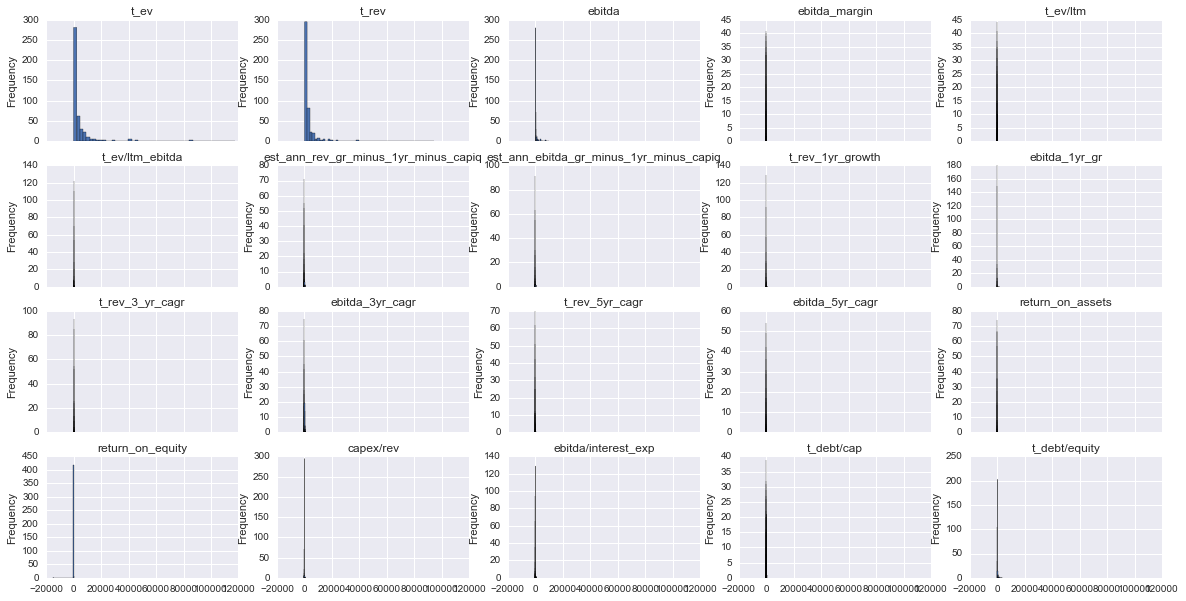

In [11]:
# feature distributions
fig, ax = plt.subplots(4,5, sharex=True, figsize=(20, 10))
a = ax.flatten()
for i, col in enumerate(num_industrials_drop.columns):
    num_industrials_drop[col].plot('hist', bins=50, ax=a[i])
    a[i].set_title(col)

Above distribution plots suggest us to fill the NA value in the original dataframe using median due the skewed distrituion.

In [10]:
# fill na value using median
num_industrials = num_industrials.fillna(num_industrials.median())
num_industrials_drop = num_industrials_drop.fillna(num_industrials_drop.median())

In [13]:
num_industrials.describe()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/ltm,t_ev/ltm_ebitda,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_gr,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex/rev,ebitda/interest_exp,t_debt/cap,t_debt/equity
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,6778.737761,3752.799408,572.919180,14.193154,1.634875,13.849626,2.343209,4.665055,6.830833,17.050285,9.085558,8.963006,6.207808,7.778668,5.671097,-15.546340,6.017461,22.259725,45.884258,160.540575
std,24350.541196,10119.915553,1559.209579,10.771110,1.382043,17.364992,15.586594,36.292205,36.816539,127.407271,67.723347,31.918735,14.349057,17.952441,5.003796,692.751529,16.722534,42.413187,30.462024,486.009711
min,0.141000,1.260000,-0.295000,-9.930000,0.022000,0.047000,-52.700000,-93.500000,-41.200000,-91.300000,-39.000000,-68.900000,-17.600000,-49.900000,-48.300000,-14990.900000,0.004000,0.025000,0.036000,0.036000
25%,379.800000,317.700000,27.200000,6.880000,0.714000,8.490000,-1.250000,-2.970000,-4.800000,-11.900000,-1.010000,-3.050000,0.579000,0.529000,3.090000,3.820000,1.390000,4.990000,28.900000,40.600000
50%,1453.050000,1166.800000,129.400000,12.300000,1.220000,11.000000,1.970000,2.790000,1.165000,1.550000,3.320000,5.190000,4.035000,5.925000,5.250000,10.200000,2.535000,9.640000,42.950000,71.550000
75%,4372.700000,2843.000000,398.500000,18.000000,2.080000,14.000000,4.650000,7.580000,8.210000,14.600000,8.540000,12.500000,8.350000,13.100000,7.750000,18.400000,4.470000,18.900000,56.700000,118.300000
max,423106.900000,123693.000000,16796.000000,76.400000,10.400000,225.100000,164.600000,437.200000,353.400000,1637.600000,1413.800000,250.100000,158.200000,177.700000,27.600000,784.700000,240.000000,294.100000,253.800000,6183.800000


## Fit the data into linear model

We are going to divide data into three parts: training, validation, and testing. Maintain the splitting across different models.

### Splitting the data

Let's only set up index here instead of actual data, because later there might be preprocessing on the data

In [17]:
np.random.seed(12434)
permutation = np.random.permutation(num_industrials.shape[0])
train_index = permutation[:len(permutation)*4/5]
test_index = permutation[len(permutation)*4/5:]

In [19]:
train_data = num_industrials.ix[train_index, :]
print 'training data shape: ', train_data.shape
test_data = num_industrials.ix[test_index, :]
print 'testing data shape: ', test_data.shape

training data shape:  (378, 20)
testing data shape:  (95, 20)


In [22]:
train_x = train_data.iloc[:, 1:]
train_y = train_data.iloc[:, 0]
test_x = test_data.iloc[:, 1:]
test_y = test_data.iloc[:, 0]

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lr_model = LinearRegression()
lr_model.fit(np.array(train_x.iloc[:, 0:1]), train_y)
y_hat = lr_model.predict(np.array(train_x.iloc[:, 0:1]))
print metrics.mean_squared_error(y_hat, train_y)
#rf_model = RandomForestRegressor()
#scores = cross_val_score(rf_model, train_x, train_y, cv=5, scoring='neg_mean_squared_error')
#print 'mean square error for cross validation: ', np.mean(scores), np.std(scores)

152409581.948


### Try the data without outlier

From above result, we see that the linear regression has an extremely bad result. Let's try to use the data without outlier then.

In [12]:
# Data taken out the max value
num_industrials_drop.describe()

,t_ev,t_rev,ebitda,ebitda_margin,t_ev/ltm,t_ev/ltm_ebitda,est_ann_rev_gr_minus_1yr_minus_capiq,est_ann_ebitda_gr_minus_1yr_minus_capiq,t_rev_1yr_growth,ebitda_1yr_gr,t_rev_3_yr_cagr,ebitda_3yr_cagr,t_rev_5yr_cagr,ebitda_5yr_cagr,return_on_assets,return_on_equity,capex/rev,ebitda/interest_exp,t_debt/cap,t_debt/equity
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,5968.132377,3533.227364,545.450211,14.151769,1.593338,12.948351,1.713438,2.990089,5.099881,13.194553,5.370386,8.496017,5.715965,7.621514,5.678233,-19.540658,5.533717,22.030937,44.741948,136.443468
std,15204.164629,8577.748986,1386.816267,10.433350,1.292999,11.942765,13.203596,29.410385,28.905691,103.603322,16.733904,30.302721,10.950970,16.122064,4.869304,701.416379,12.905833,40.899577,27.394576,302.435589
min,0.141000,1.260000,-0.295000,-9.930000,0.022000,0.047000,-52.700000,-93.500000,-41.200000,-91.300000,-39.000000,-68.900000,-17.600000,-49.900000,-48.300000,-14990.900000,0.004000,0.025000,0.036000,0.036000
25%,387.000000,322.750000,30.000000,6.960000,0.716000,8.450000,-1.445000,-3.400000,-4.905000,-11.900000,-1.270000,-3.120000,0.687000,0.610000,3.120000,3.890000,1.395000,5.170000,28.800000,40.400000
50%,1435.750000,1177.200000,129.400000,12.400000,1.210000,10.900000,1.780000,2.570000,1.017500,1.335000,3.280000,5.190000,4.070000,5.940000,5.265000,10.200000,2.525000,10.150000,42.350000,70.800000
75%,4334.650000,2834.700000,396.050000,18.000000,2.020000,13.750000,4.525000,7.325000,8.030000,14.350000,8.325000,12.700000,8.320000,13.150000,7.625000,18.300000,4.465000,19.800000,56.050000,117.600000
max,117144.900000,94571.000000,10134.000000,72.700000,8.440000,134.000000,105.100000,330.200000,288.900000,1458.900000,169.100000,208.900000,115.300000,126.600000,25.300000,409.700000,181.200000,290.100000,232.400000,3665.000000


In [19]:
np.random.seed(124)
permutation = np.random.permutation(num_industrials_drop.shape[0])
train_index = num_industrials_drop.index[permutation[:len(permutation)*4/5]]
test_index = num_industrials_drop.index[permutation[len(permutation)*4/5:]]
train_data = num_industrials_drop.ix[train_index, :]
print 'training data shape: ', train_data.shape
test_data = num_industrials_drop.ix[test_index, :]
print 'testing data shape: ', test_data.shape

training data shape:  (367, 20)
testing data shape:  (92, 20)


In [20]:
train_x = train_data.iloc[:, 1:]
train_y = train_data.iloc[:, 0]
test_x = test_data.iloc[:, 1:]
test_y = test_data.iloc[:, 0]

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

lr_model = LinearRegression(normalize=True)
#print metrics.mean_squared_error(y_hat, train_y)
#rf_model = RandomForestRegressor()
scores = cross_val_score(lr_model, train_x, train_y, cv=5, scoring='neg_mean_squared_error')
print 'mean square error for cross validation: ', np.mean(scores), np.std(scores)

mean square error for cross validation:  -113427320.366 156937021.089
